<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB
None


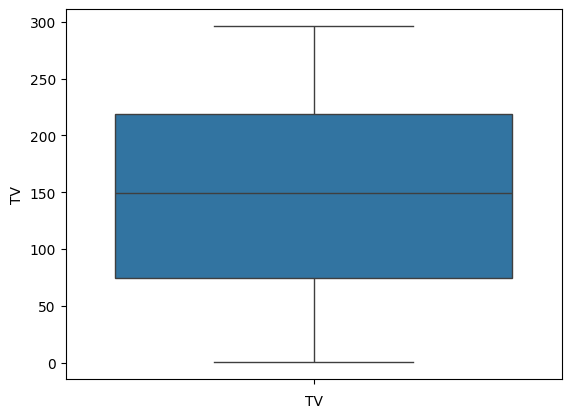

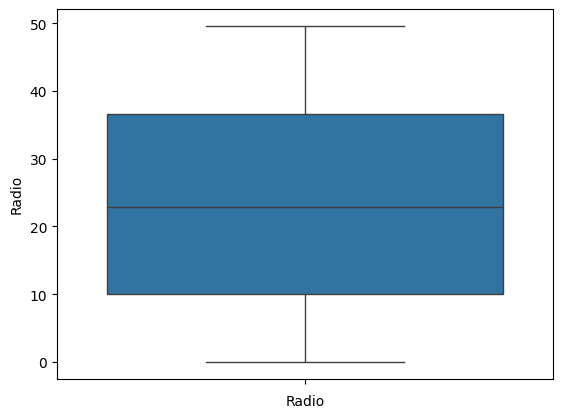

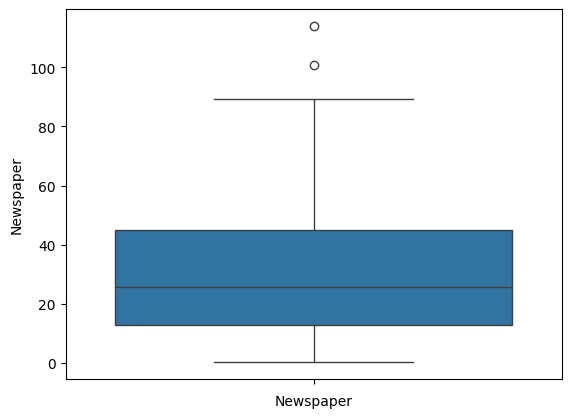

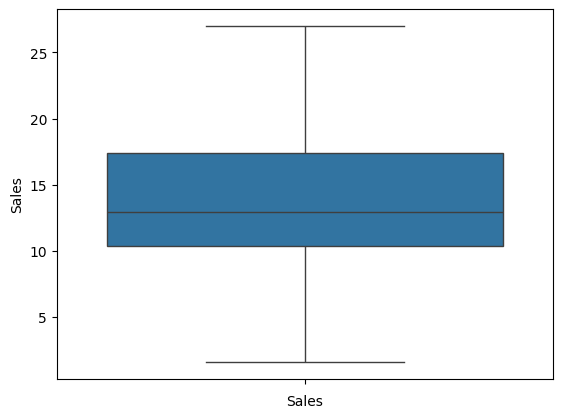

Linear Regression R2 Score: 89.89454779619588
Linear Regression MAE: 1.2497394075236383
Random Forest R2 Score: 98.45882993749896
Random Forest MAE: 0.5383083333333323
XGBoost R2 Score: 98.09617453599657
XGBoost MAE: 0.6133143973350526


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error

df = pd.read_csv("Advertising.csv")

df.columns = df.columns.str.strip()
print(df.info())
df=df[['TV','Radio','Newspaper','Sales']]
print(df.info())
for col in df.columns:
  sns.boxplot(df[col])
  plt.xlabel(col)
  plt.show()

df.drop_duplicates(inplace=True)

Q1=df['Newspaper'].quantile(0.25)
Q3=df['Newspaper'].quantile(0.75)
IQR=Q3-Q1
lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR
df=df[(df['Newspaper']>=lower_bound) & (df['Newspaper']<=upper_bound)]

X = df.drop('Sales', axis=1)
y = df['Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

print("Linear Regression R2 Score:", r2_score(y_test, y_pred_lr) * 100)
print("Linear Regression MAE:", mean_absolute_error(y_test, y_pred_lr))

rf_model = RandomForestRegressor(n_estimators=300, max_depth=None, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

print("Random Forest R2 Score:", r2_score(y_test, y_pred_rf) * 100)
print("Random Forest MAE:", mean_absolute_error(y_test, y_pred_rf))

xgb_model = XGBRegressor(n_estimators=300, learning_rate=0.05, max_depth=6, random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

print("XGBoost R2 Score:", r2_score(y_test, y_pred_xgb) * 100)
print("XGBoost MAE:", mean_absolute_error(y_test, y_pred_xgb))


Sample Data Testing

In [8]:
samples = [
    [230.1, 37.8, 69.2],
    [44.5, 39.3, 45.1],
    [17.2, 45.9, 69.3],
    [151.5, 41.3, 58.5],
    [120.2, 19.6, 11.6]
]
for i in samples:
  new_df=pd.DataFrame(columns=X_train.columns)
  new_df.loc[0] = i
  y_pred_rf = rf_model.predict(new_df)
  print(f"Sample {i} → Predicted Sales = {y_pred_rf[0]:.2f}")

Sample [230.1, 37.8, 69.2] → Predicted Sales = 21.95
Sample [44.5, 39.3, 45.1] → Predicted Sales = 10.61
Sample [17.2, 45.9, 69.3] → Predicted Sales = 8.93
Sample [151.5, 41.3, 58.5] → Predicted Sales = 18.33
Sample [120.2, 19.6, 11.6] → Predicted Sales = 13.03
